# Field correlations in Atom-Cavity systems
based on a discussion from QuTiP list, and Rebic et al. PRA **69**, 035804 (2004)

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Original question from QuTiP list, ss modified to match PRA 69, 035804
N=25

taus=np.linspace(0,1000,8000)

a=tensor(identity(2), destroy(N))

sm=tensor(sigmam(),identity(N))

sz=tensor(sigmaz(),identity(N))

g = 2*np.pi*33.9*0.001

H = g*a.dag()*a + 0.5*g*sz + g*(a.dag()*sm + a*sm.dag()) + 5.76*0.001*(a.dag()+a)

c_ops = [np.sqrt(2*np.pi*4.1*0.001)*a, np.sqrt(2*np.pi*2.6*0.001)*sm]  # this was sz, changed to sm

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [3]:
n_op = a.dag()*a
solution = mesolve(H,rho0,taus, c_ops, [n_op])
n = solution.expect[0]

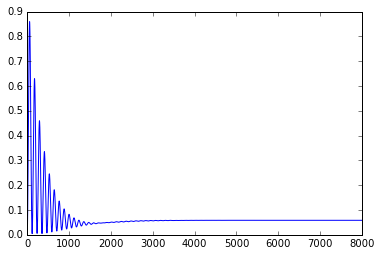

In [4]:
plt.plot(n)

In [5]:
# 1st order correlation:
# pass None as state so it solves for steady state
corr1 = correlation_2op_1t(H, None, taus, c_ops, a.dag(), a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


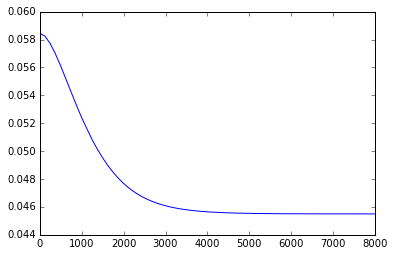

In [7]:
plt.plot(corr1)

In [11]:
# Could also just use this:
g1 = coherence_function_g1(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


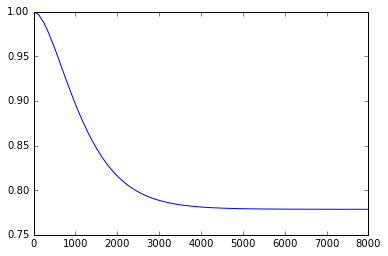

In [12]:
plt.plot(g1)

In [8]:
# 2nd order correlation
# again, pass None so it solves for steady state
corr2 = correlation_3op_1t(H, None, taus, c_ops, a.dag(), a.dag()*a, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


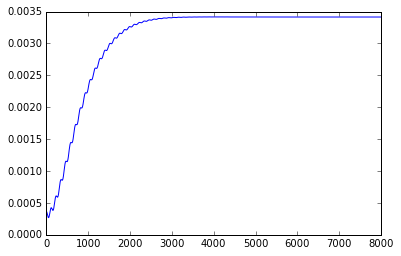

In [10]:
plt.plot(corr2)

In [13]:
# Or just use this:
g2 = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


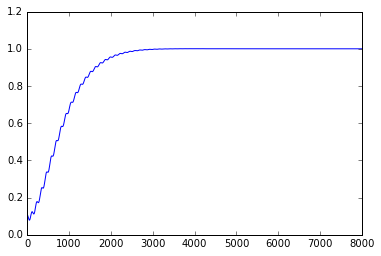

In [14]:
plt.plot(g2)

Next, look at the other details in the paper and redo this with the values they provide.

The two curves they show are for different values of g and pump, try that here:

In [15]:
g = 4*2*np.pi*33.9*0.001 # increase g by factor of 4

# increase pump by factor of 5:
H = g*a.dag()*a + 0.5*g*sz + g*(a.dag()*sm + a*sm.dag()) + 5*5.76*0.001*(a.dag()+a)

c_ops = [np.sqrt(2*np.pi*4.1*0.001)*a, np.sqrt(2*np.pi*2.6*0.001)*sm]  # this was sz, changed to sm

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [16]:
g2 = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


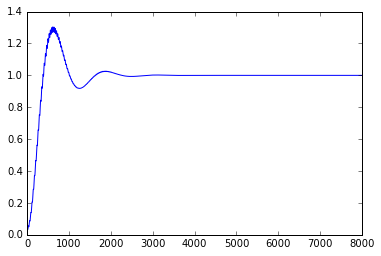

In [17]:
plt.plot(g2)

Sweet!